In [1]:
import numpy as np
import tensorflow as tf

In [2]:
print(tf.__version__)

2.4.0-rc0


In [3]:
a = tf.constant(2)
print(tf.rank(a)) # rank가 0이면, 0차원이라는 의미
print(a)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [4]:
b = tf.constant([2, 3])
print(tf.rank(b))
print(b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([2 3], shape=(2,), dtype=int32)


In [5]:
c = tf.constant([[2, 3], [3, 6]])
print(tf.rank(c))
print(c)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(
[[2 3]
 [3 6]], shape=(2, 2), dtype=int32)


In [6]:
d = tf.constant(["Hello"])
print(tf.rank(d))
print(d)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([b'Hello'], shape=(1,), dtype=string)


In [7]:
rand = tf.random.uniform(shape=[1], minval=0, maxval=1)
print(rand.shape)
print(rand)

(1,)
tf.Tensor([0.3724432], shape=(1,), dtype=float32)


In [8]:
rand2 = tf.random.normal([1, 2], mean=0, stddev=1)
print(rand2.shape)
print(rand2)

(1, 2)
tf.Tensor([[-0.03290645  1.1528369 ]], shape=(1, 2), dtype=float32)


In [9]:
rand3 = tf.random.normal(shape=(3, 2), mean=0, stddev=1)
print(rand3.shape)
print(rand3)

(3, 2)
tf.Tensor(
[[ 0.5552202   1.2081689 ]
 [-0.01211592  0.64916116]
 [-0.627849    0.45665666]], shape=(3, 2), dtype=float32)


In [10]:
# 즉시 실행 모드(Eager Mode)
a = tf.constant(2)
b = tf.constant(3)
print(tf.add(a, b))
print(a + b)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [11]:
print(tf.subtract(a, b))
print(a - b)

tf.Tensor(-1, shape=(), dtype=int32)
tf.Tensor(-1, shape=(), dtype=int32)


In [12]:
print(tf.multiply(a, b))
print(a * b)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


In [13]:
# numpy with tensorflow
c = tf.add(a, b).numpy()
print(type(c))
print(c)

<class 'numpy.int32'>
5


In [14]:
c_square = np.square(c, dtype=np.float32)
c_tensor = tf.convert_to_tensor(c_square)

print(c_tensor)
print(type(c_tensor))

tf.Tensor(25.0, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [15]:
# numpy 처럼 사용하기
t = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
print(t.shape)
print(t.dtype)

(2, 3)
<dtype: 'float32'>


In [16]:
print(t[:, 1:])

tf.Tensor(
[[2. 3.]
 [5. 6.]], shape=(2, 2), dtype=float32)


In [17]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [18]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [19]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [20]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [21]:
# type cast
# tensor의 기본 dtype
# float type tensor : float32
# int type tensor : int32
# 연산 시 tensor type을 맞춰줘야함.
# float32 ~ float32 (o)
# int32 ~ int32 (o)
# float32 ~ int32 (x)
# type 변환은 tf.cast()

a = tf.constant(2)
print(a)

b = tf.constant(2.0)
print(b)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [22]:
tf.constant(2.0) + tf.cast(tf.constant(40), tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

In [23]:
# Auto Graph
# tensorflow가 작업을 좀 더 빠르게  동작하기 위한 방법으로 Graph로 만들어 연산을 진행
# 유연성이 있음
# python 인터프리터가 없는 환경에서도 tensor를 동작할 수 있음
import timeit

In [24]:
@tf.function
def my_func(x):
    return x**2 - 10*x + 3

print(my_func(2))
print(my_func(tf.constant(2)))

tf.Tensor(-13, shape=(), dtype=int32)
tf.Tensor(-13, shape=(), dtype=int32)


In [25]:
def my_func_(x):
    return x**2 - 10*x + 3

print(my_func_(2))
print(my_func_(tf.constant(2)))

-13
tf.Tensor(-13, shape=(), dtype=int32)


In [26]:
tf_my_func_ = tf.function(my_func_)
print(tf_my_func_)
print(tf_my_func_(2))

tf.Tensor(-13, shape=(), dtype=int32)


In [27]:
tf_my_func_.python_function(2)

-13

In [28]:
def func_to_get_faster(x, y, b):
    x = tf.matmul(x, y)
    x = x + b
    return x

a_function_that_uses_a_graph = tf.function(func_to_get_faster)

x1 = tf.constant([[1.0, 2.0]])
y1 = tf.constant([[2.0], [3.0]])
b1 = tf.constant(4.0)

a_function_that_uses_a_graph(x1, y1, b1).numpy()

array([[12.]], dtype=float32)

In [29]:
def inner_func(x, y, b):
    x = tf.matmul(x, y)
    x = x + b
    return x

@tf.function
def other_func(x):
    y = tf.constant([[2.0], [3.0]])
    b = tf.constant(4.0)
    return inner_func(x, y, b)

other_func(tf.constant([[1.0, 2.0]])).numpy()

array([[12.]], dtype=float32)

In [30]:
# code로 추출
print(tf.autograph.to_code(my_func.python_function))
print(tf.autograph.to_code(tf_my_func_.python_function))
print(tf.autograph.to_code(other_func.python_function))

def tf__my_func(x):
    with ag__.FunctionScope('my_func', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def tf__my_func_(x):
    with ag__.FunctionScope('my_func_', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def tf__other_func(x

In [31]:
# 속도 향상
class SequentialModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super(SequentialModel, self).__init__(**kwargs)
        self.flatten = tf.keras.layers.Flatten(input_shape=(28, 28))
        self.dense_1 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.2)
        self.dense_2 = tf.keras.layers.Dense(10)
    
    def call(self, x):
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.dropout(x)        
        x = self.dense_2(x)
        return x
    
input_data = tf.random.uniform([60, 28, 28])

eager_model = SequentialModel()
graph_model = tf.function(eager_model)

print("Eager Time: ", timeit.timeit(lambda: eager_model(input_data), number=10000))
print("Graph Time: ", timeit.timeit(lambda: graph_model(input_data), number=10000))

Eager Time:  5.127563042
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Graph Time:  0.9296038329999998


In [32]:
# 변수 생성
X = tf.Variable(20.0)

print(X)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>


In [33]:
# 자동 미분(Autograd)
# tf.GradientTape API 이용
# tf.Variable 같은 일부 입력에 대한 기울기 계산
#     - 기본적으로 한번만 사용됨
# 변수가 포함된 연산만 기록

x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x**2

In [34]:
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

In [35]:
# 위에서 이미 한번 호출 했기 때문에 아래 코드 실행시 에러 발생
# x2 = tf.Variable(4)
# dy_dx = tape.gradient(y, x2)
# dy_dx.numpy()

x = tf.Variable(2.0)
y = tf.Variable(3.0)
with tf.GradientTape() as tape:
    y_sq = y**2
    z = x**2 + tf.stop_gradient(y_sq)

grad = tape.gradient(z, {'x': x, 'y': y})

print('dz/dx:', grad['x'])

print('dz/dy:', grad['y'])

dz/dx: tf.Tensor(4.0, shape=(), dtype=float32)
dz/dy: None


In [36]:
weights = tf.Variable(tf.random.normal((3, 2)), name='weights')
biases = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')

x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
    y = x @ weights + biases
    loss = tf.reduce_mean(y**2)

In [37]:
[dl_dw, dl_db] = tape.gradient(loss, [weights, biases])

In [38]:
print(weights.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [39]:
weights2 = tf.Variable(tf.random.normal((3, 2)), name='weights')
biases2 = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')

x2 =[[4., 5., 6.]]

[dl_dw2, dl_db2] = tape.gradient(loss, [weights2, biases2])

print(weights2.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [40]:
# 간단하 뉴런 만들기
# 입력 -> 연산 -> 활성화함수 -> 출력

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def Neuron(x, W, bias=0):
    z = x * W + bias
    return sigmoid(z)

In [41]:
x = tf.random.normal((1, 2), 0, 1)
W = tf.random.normal((1, 2), 0, 1)

print('x.shape: ', x.shape)
print('W.shape: ', W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape:  (1, 2)
W.shape:  (1, 2)
tf.Tensor([[ 0.57430965 -1.5363925 ]], shape=(1, 2), dtype=float32)
tf.Tensor([[ 0.16853055 -1.5589889 ]], shape=(1, 2), dtype=float32)
[[0.5241783  0.91646206]]


In [42]:
x = tf.random.normal((2, 1), 0, 1)
W = tf.random.normal((2, 1), 0, 1)

print('x.shape: ', x.shape)
print('W.shape: ', W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape:  (2, 1)
W.shape:  (2, 1)
tf.Tensor(
[[1.7750536]
 [2.232183 ]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[-1.5573641 ]
 [-0.25723422]], shape=(2, 1), dtype=float32)
[[0.05927826]
 [0.3602697 ]]


In [43]:
x = tf.random.normal((1,), 0, 1)
W = tf.random.normal((1, 2), 0, 1)

print('x.shape: ', x.shape)
print('W.shape: ', W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape:  (1,)
W.shape:  (1, 2)
tf.Tensor([-0.3036896], shape=(1,), dtype=float32)
tf.Tensor([[ 1.8306755  -0.21721222]], shape=(1, 2), dtype=float32)
[[0.36448342 0.5164853 ]]


In [44]:
# 퍼셉트론 학습 알고리즘(가중치 업데이트)
# - w : 가중치
# - n : 학습률
# - y : 정답 레이블
# - y~ : 예측 레이블

In [45]:
x = 1
y = 0
W = tf.random.normal([1], 0, 1)
print(Neuron(x, W))
print("y: ", y)

[0.82741517]
y:  0


In [46]:
for i in range(1000):
    output = Neuron(x, W)
    error = y - output
    W = W + x * 0.1 * error
    
    if i % 100 == 99:
        print("{}\t{}\t{}".format(i+1, error, output))

100	[-0.12939973]	[0.12939973]
200	[-0.05914794]	[0.05914794]
300	[-0.03779453]	[0.03779453]
400	[-0.02766108]	[0.02766108]
500	[-0.02177762]	[0.02177762]
600	[-0.0179434]	[0.0179434]
700	[-0.01525004]	[0.01525004]
800	[-0.01325585]	[0.01325585]
900	[-0.01172061]	[0.01172061]
1000	[-0.01050263]	[0.01050263]


In [47]:
def Neuron2(x, W, bias=0):
    z = tf.matmul(a=x, b=W, transpose_b=True) + bias
    return sigmoid(z)

In [48]:
x = tf.random.normal((1, 3), 0, 1)
y = tf.ones(1)
W = tf.random.normal((1, 3), 0, 1)

print(Neuron2(x, W))
print("y: ", y)

[[0.7953944]]
y:  tf.Tensor([1.], shape=(1,), dtype=float32)


In [49]:
for i in range(1000):
    output = Neuron2(x, W)
    error = y - output
    W = W + x * 0.1 * error
    
    if i % 100 == 99:
        print("{}\t{}\t{}".format(i+1, error, output))

100	[[0.08244592]]	[[0.9175541]]
200	[[0.05010957]]	[[0.94989043]]
300	[[0.03576905]]	[[0.96423095]]
400	[[0.02774358]]	[[0.9722564]]
500	[[0.02263325]]	[[0.97736675]]
600	[[0.01910019]]	[[0.9808998]]
700	[[0.0165146]]	[[0.9834854]]
800	[[0.01454175]]	[[0.98545825]]
900	[[0.01298767]]	[[0.9870123]]
1000	[[0.01173204]]	[[0.98826796]]


In [50]:
x = tf.random.normal((1, 3), 0, 1)
weights = tf.random.normal((1, 3), 0, 1)
bias = tf.zeros((1, 1))

y = tf.ones((1, ))

print("x\t: {}\nweights\t: {}\nbias: {}".format(x, weights, bias))

x	: [[ 0.60686237 -1.1954796   0.6357367 ]]
weights	: [[ 0.6496437 -0.3079025  1.4041382]]
bias: [[0.]]


In [51]:
for i in range(1000):
    output = Neuron2(x, weights, bias=bias)
    error = y - output
    weights = weights + x * 0.1 * error
    bias = bias + 1 * 0.1 * error
    
    if i % 100 == 99:
        print("{}\t{}\t{}".format(i+1, error, output))

100	[[0.02754509]]	[[0.9724549]]
200	[[0.01475298]]	[[0.985247]]
300	[[0.0100531]]	[[0.9899469]]
400	[[0.00761884]]	[[0.99238116]]
500	[[0.00613171]]	[[0.9938683]]
600	[[0.00512946]]	[[0.99487054]]
700	[[0.00440842]]	[[0.9955916]]
800	[[0.00386477]]	[[0.99613523]]
900	[[0.00344044]]	[[0.99655956]]
1000	[[0.00309992]]	[[0.9969001]]


In [52]:
print("x\t: {}\nweights\t: {}\nbias: {}".format(x, weights, bias))

x	: [[ 0.60686237 -1.1954796   0.6357367 ]]
weights	: [[ 1.4304482 -1.8460344  2.222093 ]]
bias: [[1.2866248]]


In [53]:
# AND Gate
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[1], [0], [0], [0]])

W = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0
    
    for j in range(4):
        output = sigmoid(np.sum(X[j] * W) + b_x + b)
        error = Y[j][0] - output
        W = W + X[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
    
    if i % 200 == 0:
        print("Epoch : {:4d}\tError Sum {}".format(i, error_sum))

print("\n가중치\t: {}".format(W))
print("편향\t: {}".format(b))


Epoch :    0	Error Sum [-0.18168]
Epoch :  200	Error Sum [-0.11988045]
Epoch :  400	Error Sum [-0.06894699]
Epoch :  600	Error Sum [-0.04831161]
Epoch :  800	Error Sum [-0.0370708]
Epoch : 1000	Error Sum [-0.03001521]
Epoch : 1200	Error Sum [-0.02518543]
Epoch : 1400	Error Sum [-0.02167759]
Epoch : 1600	Error Sum [-0.01901714]
Epoch : 1800	Error Sum [-0.01693059]

가중치	: [6.9488254 6.9520082]
편향	: [-11.602446]


In [54]:
for i in range(4):
    print("X: {} Y: {} Output: {}".format(X[i], Y[i], sigmoid(np.sum(X[i] * W) + b)))

X: [1 1] Y: [1] Output: [0.90874344]
X: [1 0] Y: [0] Output: [0.00943714]
X: [0 1] Y: [0] Output: [0.00946694]
X: [0 0] Y: [0] Output: [9.143615e-06]


In [55]:
# OR Gate
X2 = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y2 = np.array([[1], [1], [1], [0]])

W2 = tf.random.normal([2], 0, 1)
b2 = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0
    
    for j in range(4):
        output = sigmoid(np.sum(X2[j] * W2) + b_x + b2)
        error = Y2[j][0] - output
        W2 = W2 + X2[j] * 0.1 * error
        b2 = b2 + b_x * 0.1 * error
        error_sum += error
    
    if i % 200 == 0:
        print("Epoch : {:4d}\tError Sum {}".format(i, error_sum))

print("\n가중치\t: {}".format(W2))
print("편향\t: {}".format(b2))


Epoch :    0	Error Sum [0.05637121]
Epoch :  200	Error Sum [-0.04946029]
Epoch :  400	Error Sum [-0.02550638]
Epoch :  600	Error Sum [-0.01719473]
Epoch :  800	Error Sum [-0.01293659]
Epoch : 1000	Error Sum [-0.01035242]
Epoch : 1200	Error Sum [-0.00862004]
Epoch : 1400	Error Sum [-0.00738041]
Epoch : 1600	Error Sum [-0.006449]
Epoch : 1800	Error Sum [-0.00572602]

가중치	: [8.218566 8.212219]
편향	: [-4.642166]


In [56]:
for i in range(4):
    print("X: {} Y: {} Output: {}".format(X2[i], Y2[i], sigmoid(np.sum(X2[i] * W2) + b2)))

X: [1 1] Y: [1] Output: [0.9999924]
X: [1 0] Y: [1] Output: [0.9727851]
X: [0 1] Y: [1] Output: [0.9726166]
X: [0 0] Y: [0] Output: [0.00954482]


In [57]:
# XOR Gate
X3 = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y3 = np.array([[0], [1], [1], [0]])

W3 = tf.random.normal([2], 0, 1)
b3 = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0
    
    for j in range(4):
        output = sigmoid(np.sum(X3[j] * W3) + b_x + b3)
        error = Y3[j][0] - output
        W3 = W3 + X3[j] * 0.1 * error
        b3 = b3 + b_x * 0.1 * error
        error_sum += error
    
    if i % 200 == 0:
        print("Epoch : {:4d}\tError Sum {}".format(i, error_sum))

print("\n가중치\t: {}".format(W3))
print("편향\t: {}".format(b3))


Epoch :    0	Error Sum [0.06664199]
Epoch :  200	Error Sum [-0.0028165]
Epoch :  400	Error Sum [-0.0001145]
Epoch :  600	Error Sum [-4.708767e-06]
Epoch :  800	Error Sum [-1.013279e-06]
Epoch : 1000	Error Sum [-1.013279e-06]
Epoch : 1200	Error Sum [-1.013279e-06]
Epoch : 1400	Error Sum [-1.013279e-06]
Epoch : 1600	Error Sum [-1.013279e-06]
Epoch : 1800	Error Sum [-1.013279e-06]

가중치	: [ 5.1279664e-02 -2.0824373e-06]
편향	: [-0.999997]


In [58]:
for i in range(4):
    print("X: {} Y: {} Output: {}".format(X3[i], Y3[i], sigmoid(np.sum(X3[i] * W3) + b3)))

X: [1 1] Y: [0] Output: [0.27914244]
X: [1 0] Y: [1] Output: [0.27914283]
X: [0 1] Y: [1] Output: [0.2689416]
X: [0 0] Y: [0] Output: [0.26894203]


In [59]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(111)

X4 = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y4 = np.array([[0], [1], [1], [0]])

model = Sequential([
    Dense(units=2, activation='sigmoid', input_shape=(2, )),
    Dense(units=1, activation='sigmoid')])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [60]:
history = model.fit(X4, Y4, epochs=10000, batch_size=1, verbose=0)

In [61]:
model.predict(X4)

array([[0.50253373]], dtype=float32)

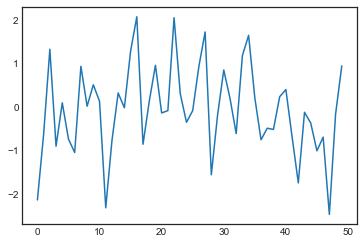

In [62]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = range(50)
y = tf.random.normal([50], 0, 1)
plt.plot(x, y)
plt.show()

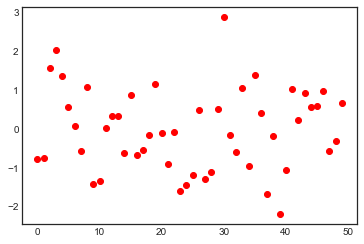

In [63]:
x = range(50)
y = tf.random.normal([50], 0, 1)
plt.plot(x, y, 'ro')
plt.show()

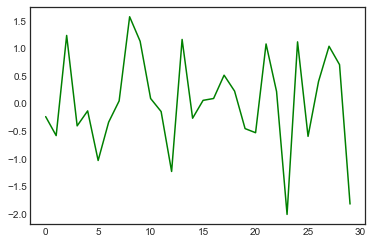

In [64]:
x = range(30)
y = tf.random.normal([30], 0, 1)
plt.plot(x, y, 'g-')
plt.show()

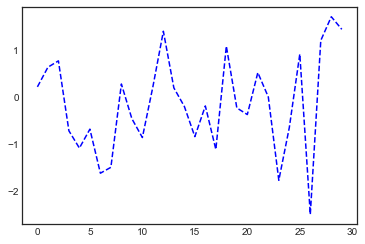

In [65]:
x = range(30)
y = tf.random.normal([30], 0, 1)
plt.plot(x, y, 'b--')
plt.show()

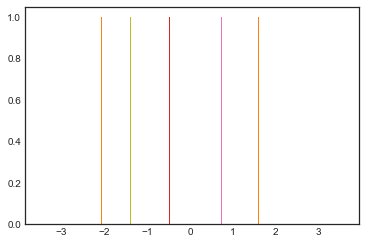

In [68]:
random_normal = tf.random.normal([1000], 0, 1)
plt.hist(random_normal, bins=100)
plt.show()

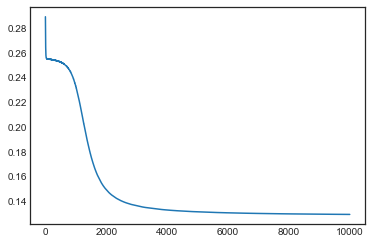

In [69]:
plt.plot(history.history['loss'])